**random sequence generator for toy distance calc**

In [1]:
from random import randint

In [2]:
randint?

**pdistance function : **

In [3]:
def pdistance(seq1, seq2):
    p = 0
    pairs = []
    for x in zip(seq1,seq2):
        if '-' not in x: pairs.append(x)
    #for (x,y) in zip(seq1,seq2):
    for (x,y) in pairs:
        if x != y:
            p += 1
    #length = (len(seq1) + len(seq2)) / 2
    length = len(pairs)
    return float(p) / length

In [4]:
def genseq(seq_len):
    """the most simplest 
    random sequence generator"""
    nucs = ["A", "T", "G", "C"]
    seq = ""
    for i in range(0, seq_len):
        seq += nucs[randint(0,3)]
    return seq
        

In [5]:
a = genseq(10000)
b = genseq(10000)

**creating multiple alignment obj from the generated sequences**

In [6]:
from Bio import AlignIO
from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord # dont't do from Bio import SeqRecord, it iport only module
from Bio.Alphabet import generic_dna

In [7]:
align = MultipleSeqAlignment([SeqRecord(Seq(a), id="a"),
                              SeqRecord(Seq(b), id="b")])
                                        

- here to find out distance we must take the lenght of the first sequence in the alignment

In [8]:
len(align[0, :])

10000

**NOTES : **
    - in AlignIO like with lists you can use slices out of range : it doesn't return an exception

In [9]:
window_size = 500
steps = len(align[0, :]) // window_size
print(steps)
start = 0
dist_container = []

for step in range(0, steps):
    finish = start + window_size + 1
    print("start: ", start, " finish: ", finish)
    seq1 = align[0, start:finish].seq
    print(seq1)
    seq2 = align[1, start:finish].seq
    print(seq2)   
    dist = pdistance(seq1, seq2)
    print(dist)
    dist_container.append(dist)
    print(dist_container)
    start = finish - 1
    print("-----------------")

20
start:  0  finish:  501
CAAGCGTTCAGTACATGGTACACGTCGGGACAGCTGCCGGGTGGACTACCATGGTCTCCTTTCCAGGGCTAAGGACTCTACATTATCTGTTGAAACGCTCAATCCCATTGGTAGGGTGTGCGCTGTATATTGTAGCAAAAACTTTAAAATACGTTACCGAGAAGCTTACACGTATGAGCGCGTCTTTACTCATTCTGCAGGAACTCACGTTGCAAGAACATCCGTGATCGTCCGAAAAAATGGAACCGATAGTCTCTGATTCGTGCAACGTACGATAAACGCGCCAGTTTATAAAACATCGTCGAATGGGTCTGGCCCTGCTCCTTATTCTTAAAAATCTGGTCGCTACCCCTACCGACCTTTTGCGCTGATTCCTCTTCTGCTTCTTTGGTTGGCCAGCCTTTTTGCACCACCCGTACATCGCATCTCTGGGGTACGAGTGAGAATGGCACCAGTGTTCACGATATAGATCTTGAGTGCATTTCGTGGCGCCTCTAGAGG
CTCGTGAGACAGGCACTGGCCAGTGGATTACGTGTATTATGCTTTTAAGTTTATCCGGGCAGTTAAAGGAGTCTCAGATATCAAACTTGAAGACTTGACCGCTATAGCACAGCTAAGTCTCAAAAAGCCCTCCGTAGCTTTTCAAAGTGCCTCCTAGCCGAGCTGCTCAGGTCGAGCGAAGGTCGCCACGGCCCGAATTAGTGCTTTGTGGATTTGCAACGGAGAGTATGTTGGTTTCGACTGGCCACTTCAGGTAACGCGTCACAGACGCGAGTATACACGTGCCTGAATAGTGCCGATCGAATGATAAAAGGGCGTCTGCTCACGGCTCATATCTTCCGAACTCCGTTGCGCGGTAATGAGGTTGGTGGGTGTGCTCGCATCAGCTATCGATCACTTCGGTCTTAACTGTCGGGCGGCGCCGACAAATAGTCTTTATTAGGTATGTCATACGTGGGGTATGTCCTGCAG

In [10]:
dist_container

[0.7864271457085829,
 0.7664670658682635,
 0.7544910179640718,
 0.7584830339321357,
 0.7624750499001997,
 0.7624750499001997,
 0.7504990019960079,
 0.7624750499001997,
 0.7445109780439122,
 0.7664670658682635,
 0.7844311377245509,
 0.7504990019960079,
 0.7584830339321357,
 0.7624750499001997,
 0.7564870259481038,
 0.7405189620758483,
 0.7544910179640718,
 0.7704590818363274,
 0.7924151696606786,
 0.76]

In [11]:
import matplotlib.pyplot as plt

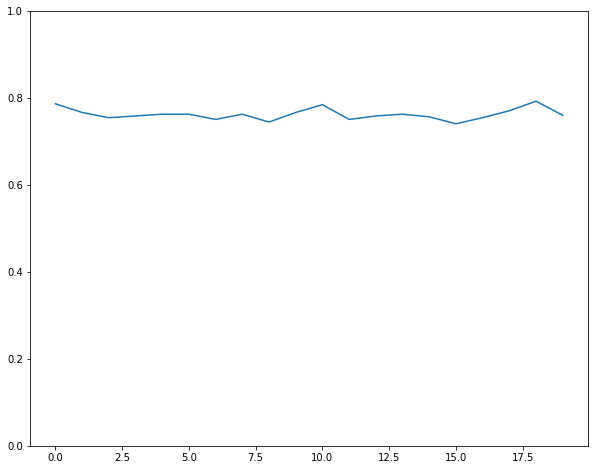

In [12]:
fig = plt.figure(figsize=(10, 8))
plt.plot(dist_container)

plt.ylim(0, 1)
plt.show()